In [1]:
from dask_jobqueue import SLURMCluster
import matplotlib.pyplot as plt 
import glob
import os
import xarray as xr 
import pandas as pd
import numpy as np


cluster = SLURMCluster(
    job_name="Climt1",          # --job-name
    cores=46,                   # 24 cores per node
    processes=8,                # One process per task
    memory="120GB",             # --mem
    walltime="01:15:00",        # --time
    queue="med",                # --partition
    log_directory=".",          # Logs will be saved to the current directory
)

from dask.distributed import Client


cluster.scale(jobs=10)
client = Client(cluster)

/home1/nalex2023/.conda/envs/nma/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33969 instead
  warnings.warn(


In [2]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.42.239.61:33969/status,
Dashboard: http://10.42.239.61:33969/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.42.239.61:41229,Workers: 0
Dashboard: http://10.42.239.61:33969/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [187]:
client.close()
cluster.close()

In [3]:
in_fol = '/home1/nalex2023/Datasets/ERA5_single_maritime/sst_and_t2m_2000_2014/'




dset_era_sst = xr.open_mfdataset(in_fol+'*.nc')


manus_sub_era = dset_era_sst.sel(latitude=slice(-1,-3),longitude=slice(145,148.5)).sel(valid_time=slice('2012-04-01','2012-04-30'))

in_fol = '/home1/nalex2023/Datasets/ERA5_land_maritime/2m_temp_skin_2000_2014/'

dset_era_land = xr.open_mfdataset(in_fol+'*.nc')

manus_sub_land = dset_era_land.sel(latitude=slice(-1,-3),longitude=slice(145,148.5)).sel(valid_time=slice('2012-04-01','2012-04-30'))
from metpy.units import units

manus_sub_era['t2m'] = manus_sub_era['t2m'] - 273.15
manus_sub_era['sst'] = manus_sub_era['sst'] - 273.15
manus_sub_land['t2m'] = manus_sub_land['t2m'] - 273.15


In [ ]:
manus_sub_era.isel(valid_time=0).t2m.plot()

NameError: name 'manus_sub_era' is not defined

: 

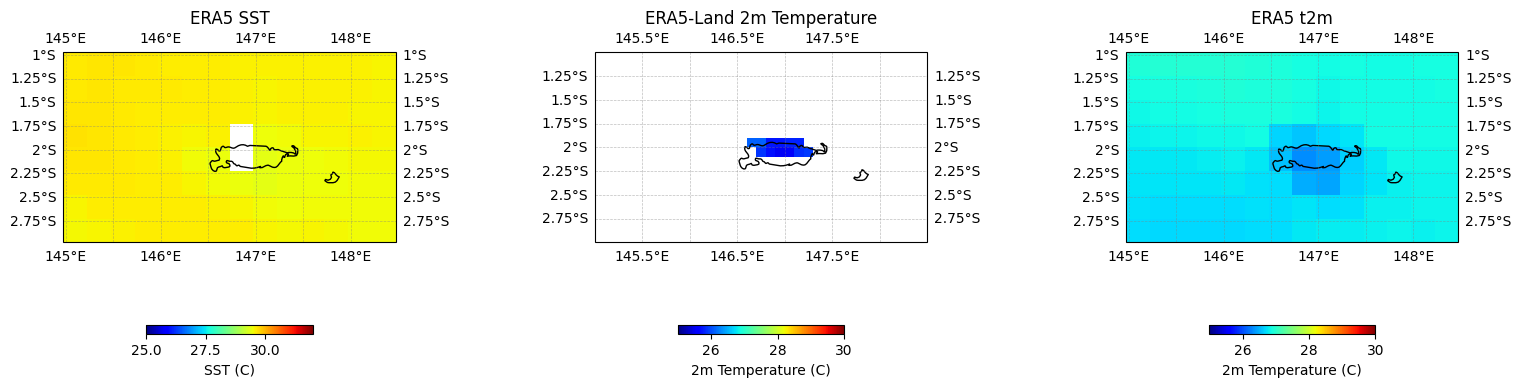

In [34]:


import cartopy.crs as crs

fig,ax = plt.subplots(1,3,figsize=(18,18),subplot_kw={'projection': crs.PlateCarree()})
cs = manus_sub_era.mean(dim='valid_time').sst.plot(transform=crs.PlateCarree(),ax=ax[0],cmap='jet',vmin=25,vmax=32,add_colorbar=True,
                                                   cbar_kwargs={'label': 'SST (C)', 'orientation': 'horizontal', 'shrink': 0.5, 'pad': 0.06})
#ax.set_extent([145, 148, -3, -0.9], crs=crs.PlateCarree())
# add gridlabels 

ax[0].set_title('ERA5 SST')

manus_sub_land.mean(dim='valid_time').t2m.plot(ax=ax[1],transform=crs.PlateCarree(),cmap='jet',vmin=25,vmax=30,add_colorbar=True,
                                                   cbar_kwargs={'label': '2m Temperature (C)', 'orientation': 'horizontal', 'shrink': 0.5, 'pad': 0.06})


manus_sub_era.mean(dim='valid_time').t2m.plot(ax=ax[2],transform=crs.PlateCarree(),cmap='jet',vmin=25,vmax=30,add_colorbar=True,
                                                   cbar_kwargs={'label': '2m Temperature (C)', 'orientation': 'horizontal', 'shrink': 0.5, 'pad': 0.06})

ax[2].set_title('ERA5 t2m')

ax[1].set_title('ERA5-Land 2m Temperature')
# move the colorbar to the bottom of the plot


#cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=5, aspect=50,shrink=0.4)

#cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', pad=0.1, aspect=50,shrink=0.4)

# adjust the gap between the subplots
plt.subplots_adjust(wspace=0.6)

for ii in ax:
    ii.coastlines()
    ii.gridlines(draw_labels=True,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')



In [35]:


land_temp_east_dropped = manus_sub_land.dropna(dim='latitude',how='all').dropna(dim='longitude',how='all')#.sel(latitude=-2,longitude=147.5,method='nearest').t2m

#land_temp_east_point = land_temp_east_dropped.sel(latitude=-2,longitude=147,method='nearest').t2m

land_temp_whole = land_temp_east_dropped.t2m.mean(dim=['latitude','longitude'])

sst_temp_east_dropped = manus_sub_era.dropna(dim='latitude',how='all').dropna(dim='longitude',how='all')

sst_temp_whole = sst_temp_east_dropped.sel(latitude=-2.1,longitude=147.1,method='nearest').sst

land_temp_whole_era = manus_sub_era.sel(longitude=slice(146.5,147.5),latitude=slice(-2,-2.5)).mean(dim=['latitude','longitude'])


#sst_temp_whole = sst_temp_east_dropped.sst.sel(latitude=slice(-1.75,-2.75),longitude=slice(147.5,148.5)).mean(dim=['latitude','longitude'])

def convert_solar(x,lon):
    """
    Convert UTC time to local solar time
    """
    return x + pd.Timedelta(hours=lon/15)

land_temp_whole['valid_time'] = convert_solar(land_temp_whole['valid_time'],lon=147.5)

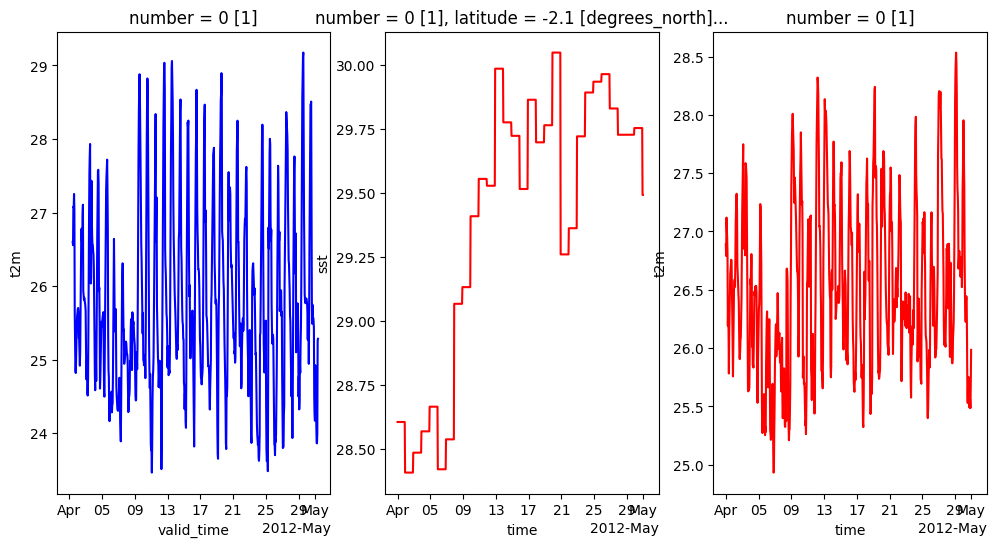

In [36]:
fig,ax = plt.subplots(1,3,figsize=(12,6),sharex=True)

land_temp_whole.plot(ax=ax[0],label='ERA5-Land 2m Temperature',color='blue')
sst_temp_whole.plot(ax=ax[1],label='ERA5 SST',color='red')

land_temp_whole_era.t2m.plot(ax=ax[2],label='ERA5 SST',color='red')



array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

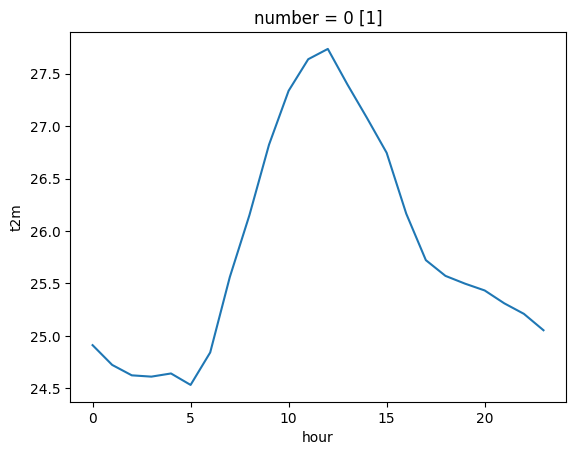

In [37]:
# diurnal UTC

land_temp_whole_diurnal = land_temp_whole.groupby('valid_time.hour').mean()

land_temp_whole_diurnal.plot()

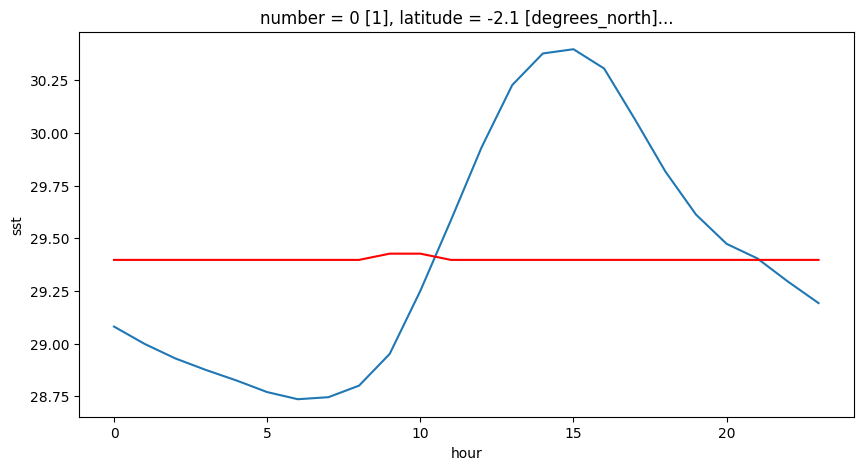

In [38]:
buoy_data = pd.read_fwf('https://tao.ndbc.noaa.gov/refreshed/cache/dm028a_WATER_TEMPERATURE_1121820250415192318251762589.txt',
                        sep=' ')

buoy_data['Date/Time'] = pd.to_datetime(buoy_data['Date/Time'], format='%Y-%m-%d %H:%M:%S')

buoy_data_sorted = buoy_data.sort_values(by='Date/Time')

# shift the time by 10 hours to match the local time

def convert_solar(x,lon):
    """
    Convert UTC time to local solar time
    """
    return x + pd.Timedelta(hours=lon/15)

buoy_data_sorted['Date/Time'] = buoy_data_sorted['Date/Time'].apply(lambda x: convert_solar(x, 165))


buoy_data_hourly = buoy_data_sorted.set_index('Date/Time').resample('h').mean()
buoy_data_hourly['hour'] = buoy_data_hourly.index.hour

buoy_data_hourly['anom'] = buoy_data_hourly['Value'] - buoy_data_hourly['Value'].mean()


buoy_diurnal = buoy_data_hourly.groupby('hour').mean()

#buoy_diurnal['anom'].plot(color='blue', label='Buoy Data')


diurnal_pattern_norm = buoy_diurnal['anom'] / np.max(np.abs(buoy_diurnal['anom']))

sst_temp_whole['valid_time']  = convert_solar(sst_temp_whole['valid_time'], 165)



sst_era_diurnal = sst_temp_whole.groupby('valid_time.hour').mean() 

sst_era_new = sst_era_diurnal + 1*diurnal_pattern_norm

fig,ax = plt.subplots(1,1,figsize=(10,5))
sst_era_new.plot(ax=ax)
sst_era_diurnal.plot(ax=ax,label='ERA5 SST Diurnal Cycle',color='red')

<Axes: xlabel='hour'>

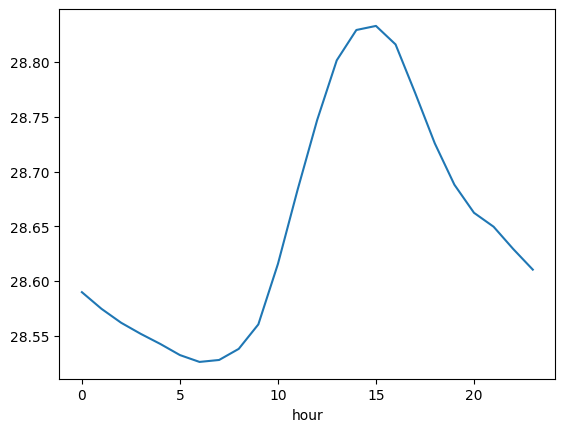

In [62]:
buoy_diurnal['Value'].plot()

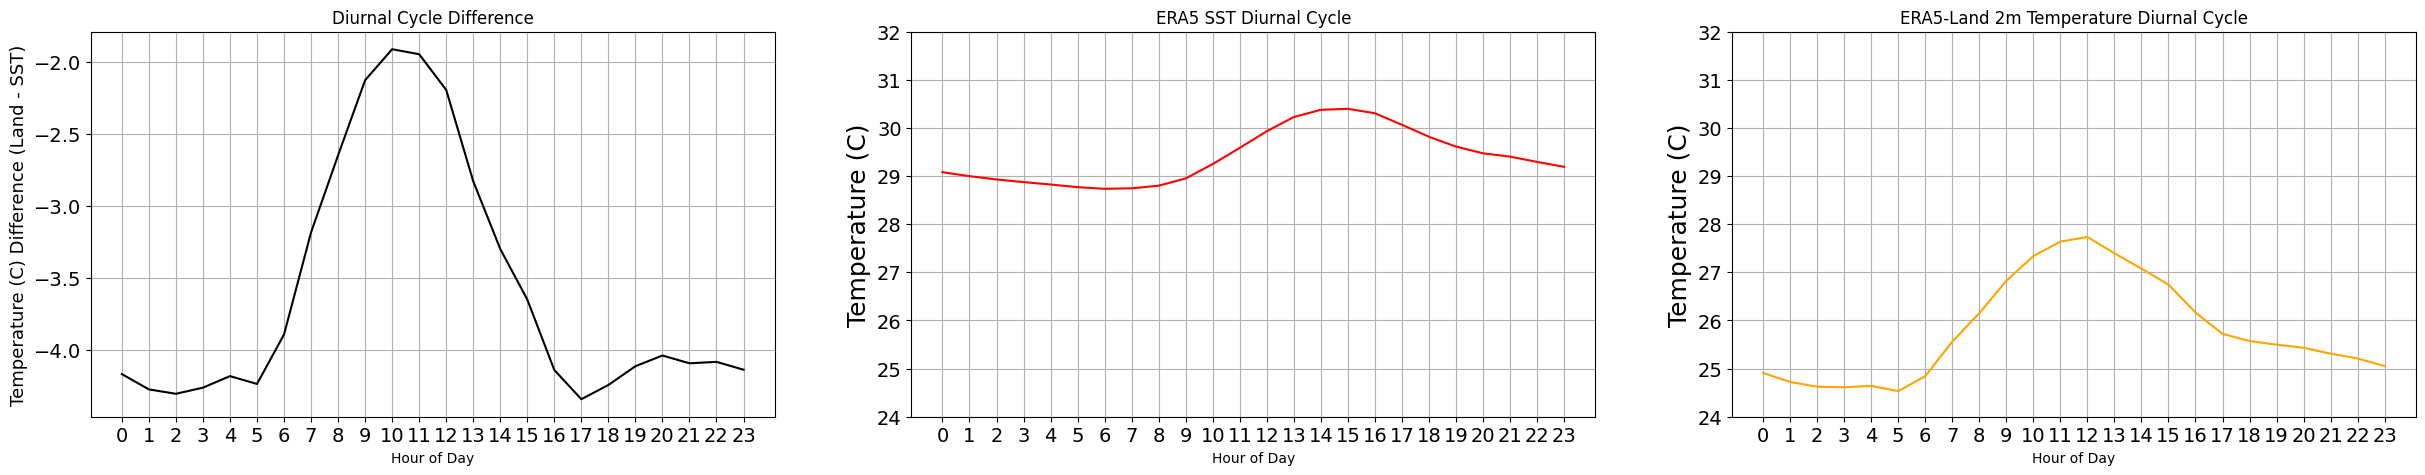

In [53]:
diff_diurnal = (land_temp_whole_diurnal - sst_era_new)

fig,ax = plt.subplots(1,3,figsize=(30,5),sharex=True)
diff_diurnal.plot(ax=ax[0],label='Diurnal Cycle Difference',color='black')
sst_era_new.plot(ax=ax[1],label='ERA5 SST Diurnal Cycle',color='red')
land_temp_whole_diurnal.plot(ax=ax[2],label='ERA5-Land 2m Temperature Diurnal Cycle',color='orange')

ax[0].set_title('Diurnal Cycle Difference')
ax[1].set_title('ERA5 SST Diurnal Cycle')
ax[2].set_title('ERA5-Land 2m Temperature Diurnal Cycle')
ax[1].set_ylim(24,32)
ax[2].set_ylim(24,32)

ax[0].set_ylabel('Temperature (C) Difference (Land - SST)',fontsize=13)
ax[1].set_ylabel('Temperature (C)',fontsize=18)
ax[2].set_ylabel('Temperature (C)',fontsize=18)



for ii in ax:
    ii.set_xticks(np.arange(0, 24, 1))
    ii.set_xticklabels(np.arange(0, 24, 1), rotation=0)
    ii.set_xlabel('Hour of Day')
    # increase all font sizes
    ii.tick_params(axis='both', which='major', labelsize=14)
    ii.tick_params(axis='both', which='minor', labelsize=14)
    ii.grid()

In [118]:
sst_oisst_files = '/home1/nalex2023/Datasets/sst_datasets/'

sst_oisst = xr.open_mfdataset(sst_oisst_files+'*.nc')



In [138]:
def create_dft(in_dir,arm_data=True):
    files = glob.glob(in_dir+os.sep+'*.nc')
    if len(files) == 0:
        files = glob.glob(in_dir+os.sep+'*.cdf')
        if len(files) == 0:
            raise Exception('No files Found')
        else:
            pass
    else:
        pass
    
    dft = pd.DataFrame(files,columns=['filepath'])
    dft['filename'] = dft['filepath'].str.split(os.sep).str[-1]
    
    if arm_data:
        dft['datetime'] = pd.to_datetime(dft['filename'].str.split(
            '.',
            expand=True).iloc[:, 2] + dft['filename'].str.split(
                '.',  expand=True).iloc[:, 3],format='%Y%m%d%H%M%S')


    return dft

In [178]:
met_fol = '/home1/nalex2023/Datasets/met_manus/manus_met_surface_raw_2012.nc'

dset_met_manus = xr.open_mfdataset(met_fol).sel(time=slice('2012-12-01','2012-12-30'))

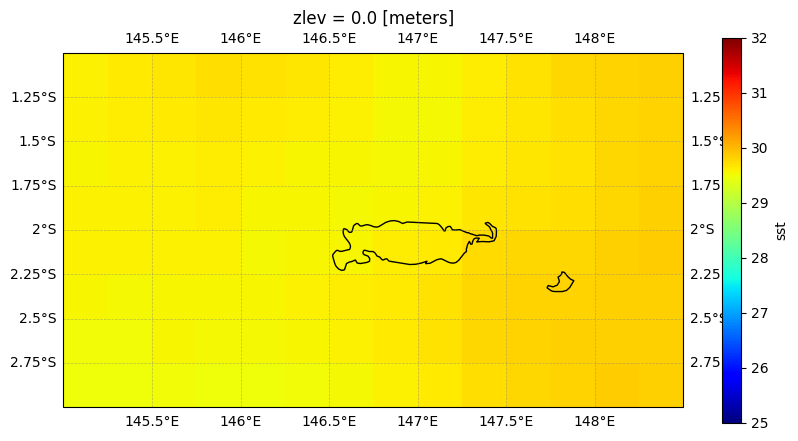

In [179]:
sst_oisst_sub = sst_oisst.sel(lat=slice(-3,-1),lon=slice(145,148.5)).sel(time=slice('2012-12-01','2012-12-30'))


fig,ax = plt.subplots(1,1,figsize=(10,5),subplot_kw={'projection': crs.PlateCarree()})   
sst_oisst_sub.mean(dim='time').sst.plot(ax=ax,transform=crs.PlateCarree(),cmap='jet',vmin=25,vmax=32,add_colorbar=True)
ax.coastlines()
ax.gridlines(draw_labels=True,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

In [181]:
oisst_point = sst_oisst_sub.sel(lat=-2.1,lon=147.5,method='nearest').sst


oisst_point_hourly = oisst_point.resample(time='1h').ffill()
oisst_point_hourly['time'] = convert_solar(oisst_point_hourly['time'], 147.5)


oisst_point_diurnal = oisst_point_hourly.groupby('time.hour').mean().sel(zlev=0)


oisst_hourly_buoy = oisst_point_diurnal + 1*diurnal_pattern_norm



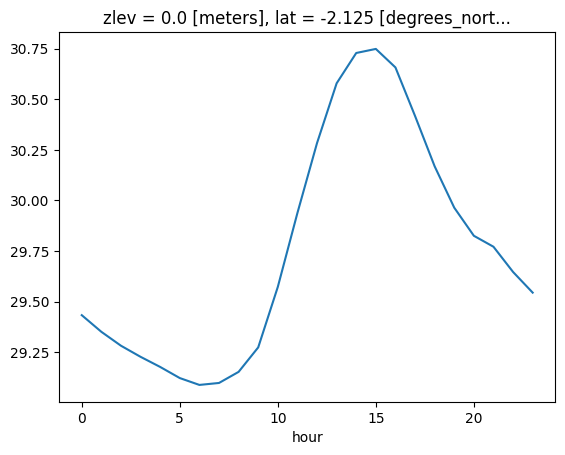

In [182]:
oisst_hourly_buoy.plot()

In [183]:
dset_met_manus['time'] = convert_solar(dset_met_manus['time'], 147.5)


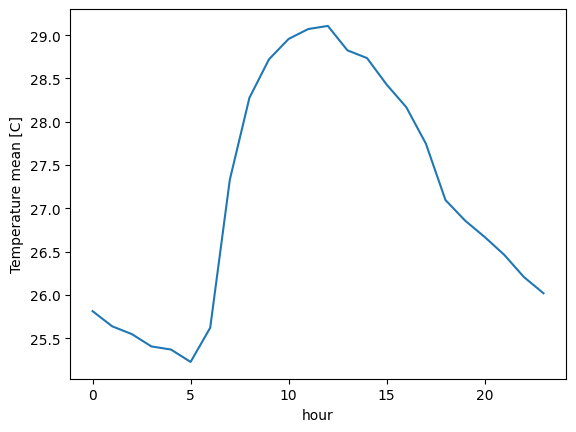

In [184]:
dset_met_manus_diurnal = dset_met_manus.groupby('time.hour').mean()

dset_met_manus_diurnal.temp_mean.plot()